Preamble with some chart settings

In [2]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np
import codecs
import argparse
import math
from scipy.special import comb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import scipy.integrate as integrate
from scipy.integrate import quad
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import floor, log10

parser = argparse.ArgumentParser(description='Plotting data.')
parser.add_argument('--dataset', type=str, help='dataset', default='test_merged.csv')
parser.add_argument('--inpath', type=str, help='where the dataset is lcoated', default='../../../resources/test/results_IS/')
parser.add_argument('--outpath', type=str, help='where to put the charts', default='../../../resources/test/results_IS/')
args, unknown = parser.parse_known_args()

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
greyscale = ['silver', 'grey', 'lightgrey', 'black']

# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

# =============================================================================
# Location String	Location Code
# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10
# =============================================================================

# =============================================================================
# These are the "Tableau 20" colors as RGB.
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
# =============================================================================
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

# ==============================================================================
path = args.inpath
outpath = args.outpath
filename = args.dataset

# datasets = ["Foodmart", "SSB"]  # ["dataset_patrick", "dataset_patrick_ssb"]
# data = pd.DataFrame()
# with codecs.open(path + filename, 'r', encoding='utf-8') as f:
#     data = pd.read_csv(f, sep=';')
#     # data.infer_objects()
# data["dataset"] = data["dataset"].apply(lambda x: "SSB" if "ssb" in x else "Foodmart")
# data["synMeta"] = data["synMeta"] + 1
# msize, m, ls, l, c = marker(filename)

# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
# exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
figsize11 = (4, 3)
figsize12 = (8, 3)
figsize13 = (12, 3)
figsize22 = (8, 6)
col_width=0.15

def default_plotsetup(ax):
    ax.grid(color="lightgray", linestyle='-', linewidth=0.3)
    ax.set_axisbelow(True)

Left complexity chart

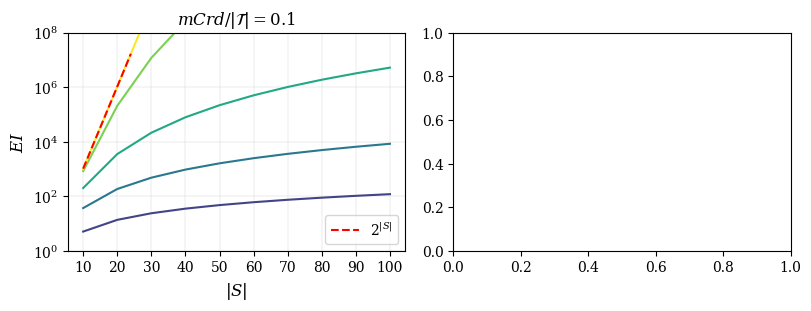

In [2]:
debug = False
debugpr = False

# returns the probability to have a trajectory in m tiles given the overall number of tiles and the average trajectory length
def pr(m, ntiles, l):
    if m > l:
        return 0.0
    else: 
        return comb(l, m) / comb(ntiles, m)
        # return my_fact(l, l-m) / my_fact(ntiles, ntiles-m)

# returns the probability to have at least mCrd trajectories in m tiles
def pr_plus(m, mcrd, ntiles, l, ntrajectories):
    p = pr(m, ntiles, l)
    c = 0.0
    for i in range(mcrd, ntrajectories + 1, 1):
        c += comb(ntrajectories, i) * math.pow(p, i) * math.pow(1 - p, ntrajectories - i)
    if debugpr:
        print("pr_plus: |S|=" + str(ntiles) + " l=" + str(l) + " |T|=" + str(ntrajectories) + " mcrd=" + str(mcrd) + " \\bar{s}=" + str(m) + ": " + str(c))
    return c

# returns EP
def ep(ntiles, l, ntrajectories, mcrd):
    c = 0
    # for m in range(1, ntiles + 1, 1):
    #     v = comb(ntiles, m) * pr_plus(m, mcrd, ntiles, l, ntrajectories)
    #     c += v
    c, foo = integrate.quad(lambda x: comb(ntiles, x) * pr_plus(x, mcrd, ntiles, l, ntrajectories), 1, ntiles)
    if debug:
        print("ep: |S|=" + str(ntiles) + " l=" + str(l) + " |T|=" + str(ntrajectories) + " mcrd=" + str(mcrd) + ": " + str(c))
    return c

def curve(ratio, ntrajectories, mcrd):
    xs = []
    ys = []
    for x in range(10, 110, 10):
        xs.append(x)
        # print(ratio * x)
        ys.append(ep(x, ratio * x, ntrajectories, mcrd))
    return (xs, ys)

fig, axs = plt.subplots(1, 2, figsize=figsize12, constrained_layout=True)
# fig, axs = plt.subplots(2, 2, figsize=figsize22, sharey=True)

i = 0
def plot(ntrajectories, mcrd):
    global i
    # ax = axs[int(i / 2)][i % 2]
    ax = axs[0]

    def inner_plot():
        for x in np.linspace(0.2, 1, num=5):
            xs, ys = curve(x, ntrajectories, mcrd)
            ax.plot(xs, ys, color=plt.cm.viridis(x)) # , label=str(round(p, 2))
        ax.set_ylabel("$EI$", fontsize=axessize)
        ax.set_xlabel("$|S|$", fontsize=axessize)

    inner_plot()
    xs = [x for x in range(10, 26, 2)]
    ax.plot(xs, [math.pow(2, x) for x in xs], label="$2^{|S|}$", color="red", ls="--")
    ax.legend()
    ax.set_yscale("log")
    ax.set_ylim([1, pow(10, 8)])
    ax.set_xticks(range(10, 110, 10))
    ax.set_title("$mCrd/|\mathcal{T}|=0.1$")
    default_plotsetup(ax)
    
mcrd = 100
# for ntrajectories in np.linspace(125, 1000, num=4):
#     plot(int(ntrajectories), mcrd)
ntrajectories = 1000
mcrd = 100
plot(ntrajectories, mcrd)

# setup the normalization and the colormap
# fig.tight_layout()
# fig.savefig('../../../../output/complexity3.svg')
fig

Right complexity chart

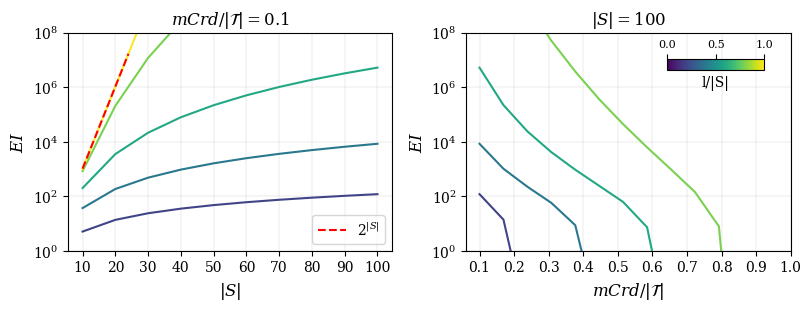

In [3]:
# debug = True
# debugpr = True
# fig, axs = plt.subplots(1, 2, figsize=figsize12)
tiles = 100
def plot(ntrajectories, l):
    ax = axs[1]
    xs, ys = [], []
    y = 1
    for x in np.linspace(0.1, 1.0, num=14):
        if y >= 1:
            xs.append(x)
            y = ep(tiles, l, ntrajectories, int(ntrajectories * x))
            ys.append(y)
    ax.plot(xs, ys, color=plt.cm.viridis(l / tiles))
    ax.set_ylabel("$EI$", fontsize=axessize)
    ax.set_xlabel("$mCrd/|\mathcal{T}|$", fontsize=axessize)
    ax.set_yscale("log")
    ax.set_ylim([1, pow(10, 8)])
    ax.set_xticks(np.linspace(0.1, 1.0, num=10))
    ax.set_title("$|S|=100$")
    default_plotsetup(ax)

for x in np.linspace(0.2, 0.8, num=4):
    plot(ntrajectories, int(x * tiles))

normalize = mcolors.Normalize(vmin=0, vmax=1)
colormap = cm.viridis
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(np.arange(0, 1))
axins1 = inset_axes(axs[1], width='30%', height='5%', loc='upper right', borderpad=1.9)
cbar = fig.colorbar(scalarmappaple, label='l/|S|', cax=axins1, orientation='horizontal')
cbar.ax.tick_params(labelsize=8) 
axins1.xaxis.set_ticks_position('top')

#plot(ntrajectories, int(60))
# fig.tight_layout()
fig.savefig('../../../../output/complexity3.svg')
fig  

Creating formatted latex table

In [10]:
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if num < 1000:
        return num

    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

mapping = { 'nitemsets': 'Patterns', 'exploredpatterns': 'Explored', 'exploredpatterns2': 'Explored2', 'time(ms)': 'Time (s)', 'minsup': '$mLen$', 'minsize': '$mCrd$', 'ntransactions': '$|S|$', 'limit': '$|\mathcal{Q}|$', 'nexecutors': 'Executor', 'maxram': 'RAM', 'accmlen': 'filter-mLen', 'accmcrd': 'filter-mCrd', 'accmsup': 'filter-Red' }

valmapping = {'trajectory.milan_standard': '\sf{Milan}', 'trajectory.oldenburg_standard': '\sf{Oldenburg}'}

milan = { 
    'coordinates': { '$mLen$': 12, '$mCrd$': 100, 'bins':  16, '$|\mathcal{Q}|$': 1000000, 'Executor': 10, 'RAM': '8g' },
    'filters': { 'intable': 'trajectory.milan_standard', 'epss' : 'inf', 'epst' : 'inf', 'timescale' : 'DailyScale'  },
    'measures': [ '$|S|$', 'Patterns', 'Time (s)', 'filter-mLen', 'filter-mCrd', 'filter-Red', 'Explored2' ] #  , 
}

oldenburg = { 
    'coordinates': { '$mLen$': 12, '$mCrd$': 500, 'bins':  19, '$|\mathcal{Q}|$': 1000000, 'Executor': 10, 'RAM': '8g' },
    'filters': { 'intable': 'trajectory.oldenburg_standard', 'epss' : 'inf', 'epst' : 'inf', 'timescale' : 'AbsoluteScale' },
    'measures': [ '$|S|$', 'Patterns', 'Time (s)' ] # '$|S|$', 'Explored', 
}

configs = [milan, oldenburg]

for config in configs: 
    for key, value in config['coordinates'].items():
        
        df = pd.read_csv("../../../../results/CTM_stats2.csv")
        df = df.rename(columns=mapping)
        
        for ikey, ivalue in config['filters'].items():
            prevdf = df
            df = df[df[ikey].astype(str) == str(ivalue)]
            if df.size == 0:
                print(prevdf)
                print(ikey)
                print(ivalue)

        for ikey, ivalue in config['coordinates'].items():
            if key != ikey:
                df = df[df[ikey] == ivalue]
        
        df = df[config["measures"] + [key]]
        df = df.groupby(key).mean().reset_index()
        df["Time (s)"] = (df["Time (s)"] / 1000).astype(int)
        # df["$|S|$"] = df["$|S|$"].astype(int).astype(str)
        
        for fkey in df.columns:
            if (df[fkey].dtype == np.float64 or df[fkey].dtype == np.int64) and fkey != "$|S|$":
                df[fkey] = df[fkey].apply(lambda x: sci_notation(x))
            df[fkey] = df[fkey].astype(str) 
        print(df.to_latex(index=False, escape=False, bold_rows=True))
        

\begin{tabular}{llllllll}
\toprule
$mLen$ & $|S|$ &          Patterns & Time (s) & filter-mLen & filter-mCrd & filter-Red &         Explored2 \\
\midrule
     6 &   360 &  $1.1\cdot10^{7}$ &      554 &           0 &           0 &          0 &  $8.6\cdot10^{8}$ \\
     8 &   360 &  $7.4\cdot10^{6}$ &      551 &           0 &           0 &          0 &  $1.2\cdot10^{9}$ \\
    10 &   360 &  $3.7\cdot10^{5}$ &      338 &           0 &           0 &          0 &  $9.8\cdot10^{8}$ \\
    12 &   360 &  $6.8\cdot10^{3}$ &      284 &           0 &           0 &          0 &  $9.5\cdot10^{8}$ \\
\bottomrule
\end{tabular}

\begin{tabular}{llllllll}
\toprule
$mCrd$ & $|S|$ &          Patterns & Time (s) & filter-mLen & filter-mCrd & filter-Red &         Explored2 \\
\midrule
    70 &   360 &  $8.6\cdot10^{4}$ &      553 &           0 &           0 &          0 &  $2.3\cdot10^{9}$ \\
    80 &   360 &  $3.5\cdot10^{4}$ &      436 &           0 &           0 &          0 &  $1.6\cdot10^{9}$ \\
    9

Useless complexity chart (apriori vs row enumeration)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize11)
def plot():
    xs = list(range(20, 201))
    ax.plot(xs, [math.pow(2, x) for x in xs], label="CTM", ls="--")
    ax.plot(xs, [math.pow(2, 125) for x in xs], label="Apriori-like")
    ax.set_ylabel("Search space", fontsize=axessize)
    ax.set_xlabel("$|S|$", fontsize=axessize)
    default_plotsetup(ax)
    ax.legend()
    ax.set_yscale("log")

plot()

fig.tight_layout()
fig.savefig('../../../../output/complexity4.svg')
fig

fig, ax = plt.subplots(1, 1, figsize=figsize11)
def plot1():
    xs = list(range(0, 201))
    ax.plot(xs, [math.pow(2, x) for x in xs], label="Apriori-like", ls="--")
    ax.plot(xs, [math.pow(2, 100) for x in xs], label="CTM")
    ax.set_ylabel("Search space", fontsize=axessize)
    ax.set_xlabel("$|\mathcal{R}|$", fontsize=axessize)
    default_plotsetup(ax)
    ax.legend()
    ax.set_yscale("log")

plot1()

fig.tight_layout()
# fig.savefig('../../../../output/complexity4.svg')
fig

In [6]:
oldenburg_standard = { 
    'coordinates': { '$mLen$': 27, 'bins':  20 },
    'filters': { '$mCrd$': 10, '$|\mathcal{Q}|$': 1000000, 'Executor': 10, 'RAM': '8g', 'epss' : 'inf', 'epst' : 'inf', 'timescale' : 'AbsoluteScale' },
    'measures': [ '$|S|$', 'Patterns', 'Explored2', 'Time (s)' ] # '$|S|$', 
}


for key, value in oldenburg_standard['coordinates'].items():
    fig, ax = plt.subplots(1, 1, figsize=figsize11)
    for algorithm in ['CTM', 'SPARE']:
    
        df = pd.read_csv("../../../../results/vsspare.csv")
        df = df.rename(columns=mapping)
        df = df[df['algorithm'] == algorithm]

        for ikey, ivalue in oldenburg_standard['filters'].items():
            if ikey in df.columns:
                prevdf = df
                df = df[df[ikey].astype(str) == str(ivalue)]

        for ikey, ivalue in oldenburg_standard['coordinates'].items():
            if key != ikey:
                df = df[df[ikey] == ivalue]

        df = df[oldenburg_standard["measures"] + [key]].groupby(key)
        k = df.groups.keys()
        df = df.mean().reset_index()
        df["Time (s)"] = (df["Time (s)"] / 1000).astype(int)
        
        i = 0
        
        for m in ["Explored2"]: # oldenburg_standard["measures"]:
            # ax[i%2][int(i/2)].set_title(m)
            # ax = ax[i%2][int(i/2)]
            # i += 1
            ax.plot(k, df[m], label=algorithm, ls="--" if algorithm == 'CTM' else "-", c=tableau20[0] if algorithm == 'CTM' else tableau20[2])
            ax.set_yscale('log')
            default_plotsetup(ax)
            ax.set_ylabel('Enumerated', fontsize=axessize)
            ax.set_xlabel(key, fontsize=axessize)
            if algorithm == 'SPARE':
                ax.plot(list(k)[0], df[m].max(), marker='x', markersize=8, c=tableau20[2])
            
            
        # ax[0][1].set_ylabel("Explored", fontsize=axessize)
        # ax[0][1].set_xticks([x for x in np.linspace(5, 35, 8)])
        # ax[0][1].set_yticks([math.pow(10, x) for x in np.linspace(5, 8, 4)])
        # ax[0][0].legend()
        ax.set_xticks([int(x) for x in np.linspace(5, 35, 7)])
        ax.set_yticks([math.pow(10, x) for x in np.linspace(5, 9, 5)])
        ax.legend()
        
        for fkey in df.columns:
            if (df[fkey].dtype == np.float64 or df[fkey].dtype == np.int64) and fkey != "$|S|$":
                df[fkey] = df[fkey].apply(lambda x: sci_notation(x))
            df[fkey] = df[fkey].astype(str) 
        # print(df.to_latex(index=False, escape=False, bold_rows=True))
    fig.tight_layout()
    fig.savefig('../../../../output/comparison_' + str(key.replace('$', '')) + '.svg')
    fig.show()

/home/mfrancia/ctm/src/main/python/CTM/venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/mfrancia/ctm/src/main/python/CTM/venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Old (useless probability formulation)

In [ ]:
def cum(begin, end, p, x):
    c = 0
    for i in range(begin, end + 1):
        c += comb(x, i) * math.pow(p, i) * math.pow(1 - p, x - i)
    return c
    
def traj_in_tile_prob(p, trajectories):
    rows = {}

    for i in reversed(range(0, trajectories + 1)):
        row = {}
        row["prob"] = cum(i, i, p, trajectories)
        c = row["prob"]
        for key, value in rows.items():
            c += value["prob"]
        row["cprob"] = c
        rows[i] = row
    # print(rows)
    return rows

def tiles_prob(p, tiles, minsize, trajectories):
    res = traj_in_tile_prob(p, trajectories)
    p = res[minsize]["cprob"]
    df = pd.DataFrame()

    rows = []
    for i in reversed(range(0, tiles + 1)):
        row = {}
        row["p"] = p
        row["#tiles"] = tiles
        row["#trajs"] = trajectories
        row["minsize"] = minsize
        row["ntiles"] = i
        row["prob"] = cum(i, i, p, tiles)
        c = row["prob"]
        for r in rows:
            c += r["prob"] 
        row["cprob"] = c
        rows.append(row)
    df = df.append(pd.DataFrame(rows))
    return df

# ntiles = 80
# minsize = 500
# ntrajectories = 1000

# ntiles = 44
# minsize = 200
# ntrajectories = 1000

ntiles = 100
minsize = 500
ntrajectories = 1000

fig, ax = plt.subplots(1, 1, figsize=figsize11)

# setup the normalization and the colormap
nValues = np.arange(0, 1)
normalize = mcolors.Normalize(vmin=0, vmax=1)
colormap = cm.gray
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nValues)
plt.colorbar(scalarmappaple)

def plot(p):
    df = tiles_prob(p, ntiles, minsize, ntrajectories)
    ax.plot(df["ntiles"], df["cprob"], color=plt.cm.gray(p)) # , label=str(round(p, 2))
    ax.set_ylabel("$Pr$", fontsize=axessize)
    ax.set_xlabel("$n$", fontsize=axessize)
    ax.set_ylim([0, 1.05])
    default_plotsetup(ax)
    # ax.legend()

for p in np.flip(np.linspace(0.35, 0.53, num=21)): # logspace
    plot(p)

# plot(0.5)
fig.tight_layout()
# fig.savefig('../../../../output/complexity2.svg')
fig